In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import preprocessing
text, labels = preprocessing.preprocessing("data/Twitter_Data.csv")

training_portion = .8
divide = int(len(text)*training_portion)
train_tweets, validation_tweets = text[:divide], text[divide:]
train_labels, validation_labels = labels[:divide], labels[divide:]
    

vocab_size = 18000
max_length = 50
import tokenize_data
train_padded, validation_padded = tokenize_data.tokenize(train_tweets, validation_tweets, max_length, vocab_size)
training_label, validation_label = tokenize_data.label_tokenize(train_labels, validation_labels)

print(train_padded.shape)
print(validation_padded.shape)

(13525, 50)
(3382, 50)


In [3]:
import embedding
embedding_dim = 200
embeddings_matrix = embedding.embedding(train_tweets, vocab_size, embedding_dim)

In [4]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length = max_length, weights=[embeddings_matrix]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation = 'sigmoid'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 200)           3600200   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 128)           135680    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 3,778,204
Trainable params: 3,778,204
Non-trainable params: 0
______________________________________________

In [9]:
num_epochs = 5
history = model.fit(train_padded, training_label, epochs = num_epochs, validation_data=(validation_padded, validation_label), verbose = 2)

Train on 13525 samples, validate on 3382 samples
Epoch 1/5
13525/13525 - 111s - loss: 0.6269 - acc: 0.7590 - val_loss: 0.4867 - val_acc: 0.8114
Epoch 2/5
13525/13525 - 92s - loss: 0.4340 - acc: 0.8291 - val_loss: 0.4380 - val_acc: 0.8214
Epoch 3/5
13525/13525 - 92s - loss: 0.3630 - acc: 0.8596 - val_loss: 0.4783 - val_acc: 0.8255
Epoch 4/5
13525/13525 - 93s - loss: 0.3107 - acc: 0.8787 - val_loss: 0.4430 - val_acc: 0.8350
Epoch 5/5
13525/13525 - 89s - loss: 0.2734 - acc: 0.8994 - val_loss: 0.4248 - val_acc: 0.8365


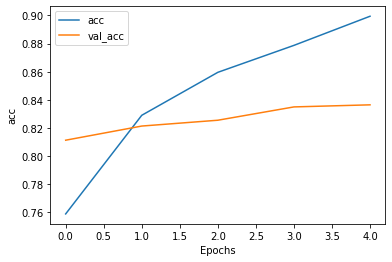

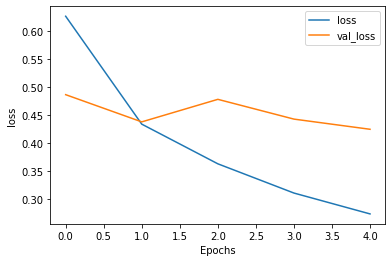

In [10]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")